6/6 12:00 (婧瑜) <br/>
- 使用者輸入哪一檔股票、投入金額
- 時間區間直接設定一年、 抓取股價資料
- 計算值KD、加上KD值的欄位、前一天KD值(B_K, B_D)的欄位
- 計算並加上買進、賣出的欄位(buy, sell)

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2021-07-13 05:14:22--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-07-13 05:14:22--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-07-13 05:14:22--  https://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving iweb.dl.sourceforge

In [ ]:
import requests
import pandas as pd
from io import StringIO
import datetime
import os
import talib
url="https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=1&issuetype=1&industry_code=&Page=1&chklike=Y"
response=requests.get(url)
listed=pd.read_html(response.text)[0]
listed.columns=listed.iloc[0,:]
listed=listed[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]
listed=listed.iloc[1:]
stock_1=listed["有價證券代號"]
stock_num=stock_1.apply(lambda x: str(x)+".TW")
stock_num

def stock_data(stock_id,time_start,time_end) :
    days = 24 * 60 * 60  
    initial = datetime.datetime.strptime( '1970-01-01' , '%Y-%m-%d' )
    start = datetime.datetime.strptime( time_start , '%Y-%m-%d' )
    end = datetime.datetime.strptime( time_end, '%Y-%m-%d' )
    period1 = start - initial
    period2 = end - initial
    s1 = str(period1.days * days)
    s2 = str(period2.days * days)
    url = "https://query1.finance.yahoo.com/v7/finance/download/"+stock_id+".TW?period1="+s1+"&period2="+s2+"&interval=1d&events=history&includeAdjustedClose=true"
    response1 = requests.get(url)
    df = pd.read_csv(StringIO(response1.text),index_col = "Date",parse_dates=['Date'])
    address = r"C:\Users\HP\Desktop\網資期末\\" + stock_id + ".csv"
    if  os.path.isfile(address):
        df_new = pd.read_csv(address,index_col = "Date", parse_dates=["Date"])
        if time_start not in df_new.index:
            df_new = df_new.append(df)
            df_new.to_csv(address,encoding='utf-8')
            print("已更新到最新資料")
        else:
            print("已是最新資料，無需更新")
    else:
        df.to_csv(address,encoding='utf-8')
        print("此為新資料，已創建csv檔")

time_start = "2020-01-02" 
time_end = "2020-12-31"
ID=input("輸入股票代碼:")
money=input("輸入投入金額:")

stock_data(ID,time_start,time_end)


輸入股票代碼:2330
輸入投入金額:500000


ValueError: ignored

In [ ]:
df = pd.read_csv(r"C:\Users\HP\Desktop\網資期末\\"+ID+".csv",index_col = "Date")
df = df.loc[:,:]
df["K"],df["D"] = talib.STOCH(df['High'], 
                df['Low'], 
                df['Close'], 
                fastk_period=9,
                slowk_period=3,
                slowk_matype=1,
                slowd_period=3,
                slowd_matype=1)
df["B_K"] = df["K"].shift(1)
df["B_D"] = df["D"].shift(1)
df.tail()
buy = []
for i in range(len(df)):
    if df["B_K"][i] < df["B_D"][i] and df["K"][i] > df["D"][i]:
        buy.append(1)
        if i == len(df): ###凱part : 為了最後一天若遇到黃金交叉的話，強迫賣掉
          sell.append(-1) ###凱part 
    else:
        buy.append(0)
df["buy"] = buy
df.loc[df["buy"].isin([1])]

sell = []
for i in range(len(df)):
    if df["B_K"][i] > df["B_D"][i] and df["K"][i] < df["D"][i]:
        sell.append(-1)
    else:
        sell.append(0)
df["sell"] = sell
sell
df.loc[df["sell"].isin([-1])]

print(df)

             Open   High    Low  Close  ...        B_K        B_D  buy  sell
Date                                    ...                                 
2020-01-02  332.5  339.0  332.5  339.0  ...        NaN        NaN    0     0
2020-01-03  344.0  345.0  335.5  339.5  ...        NaN        NaN    0     0
2020-01-06  333.0  334.5  332.0  332.0  ...        NaN        NaN    0     0
2020-01-07  332.5  333.0  326.5  329.5  ...        NaN        NaN    0     0
2020-01-08  325.0  333.0  325.0  329.5  ...        NaN        NaN    0     0
...           ...    ...    ...    ...  ...        ...        ...  ...   ...
2020-12-24  511.0  512.0  508.0  510.0  ...  40.276456  41.118887    1     0
2020-12-25  514.0  515.0  510.0  511.0  ...  43.215151  42.167019    0     0
2020-12-28  512.0  515.0  509.0  515.0  ...  48.530652  45.348836    0     0
2020-12-29  515.0  517.0  513.0  515.0  ...  65.174417  55.261626    0     0
2020-12-30  516.0  525.0  514.0  525.0  ...  73.496299  64.378963    0     0

In [ ]:
#調整：第一次交易是賣出，不可以。必須得是買進，所以那次交易不算
#調整前
print(df.loc[df["sell"].isin([-1])].index[0])
print(df.loc[df["buy"].isin([1])].index[0])

firstBuy = df.loc[df["buy"].isin([1])].index[0]
firstSell = df.loc[df["sell"].isin([-1])].index[0]


if  firstSell < firstBuy: #代表第一次賣的日期比第一次買還早
  df.loc[firstSell,'sell'] = 0   #則那次賣的交易不算


# 調整後
print(df.loc[df["sell"].isin([-1])].index[0])
print(df.loc[df["buy"].isin([1])].index[0])


2020-02-17
2020-02-04
2020-02-17
2020-02-04


6/8 12:00 (叔孟) <br/>
- 以投入金額來計算，實際買進賣出的次數、時間點 



In [ ]:
import math

bs = []
pocket = float(money)
r_sell = []
r_buy = []
num = []
n = 0


for i in range(len(df['buy'])):
    bs.append(df['buy'][i]+df['sell'][i])

for i in range(len(bs)):

    if bs[i] == 1: #出現黃金交叉
        if pocket >= (df['Close'][i] * 1000): #錢夠就買一張就買
            n = math.floor(pocket // math.floor(df['Close'][i] * 1000)) #計算能買幾張
            num.append(n)
            cost = n * df['Close'][i] * 1000 #計算花了多少錢(張數*股價*1000)
            pocket -= cost #買: 手頭上的錢減去股價
            r_sell.append(0)
            r_buy.append(1)
            print (f"{df.index[i]}買進{n}張,每張為{df['Close'][i]*1000}，花了{cost}元，剩下{pocket}元")
        else: #錢不夠就無法有做為
            print (f"{df.index[i]}出現黃金交叉，但手頭上的金額{pocket}不足以買進1張{df['Close'][i]*1000}元的股票")
            num.append(n)
            r_sell.append(0)
            r_buy.append(0)
    elif bs[i] == -1: #出現死亡交叉
        if n == 0: #手上如果無股票就無法有作為
          print (f"{df.index[i]}出現死亡交叉，但手頭上無股票可賣出")
          r_sell.append(0)
          r_buy.append(0)
        elif n > 0: #手上如果有股票就賣出
          benefit = n * df['Close'][i] * 1000 #計算收穫了多少錢(張數*股價*1000)
          pocket += benefit #賣: 手頭上的錢加上股價
          print (f"{df.index[i]}賣出{n}張，每張為{df['Close'][i]*1000}，收穫{benefit}元，剩下{pocket}元")
          n = 0 #手頭上的股票張數歸零
          r_sell.append(-1)
          r_buy.append(0)
    elif bs[i] == 0: #沒出現交叉: 無作為
        r_sell.append(0)
        r_buy.append(0)

2020-02-04出現黃金交叉，但手頭上的金額300000.0不足以買進1張325000.0元的股票
2020-02-17出現死亡交叉，但手頭上無股票可賣出
2020-03-03出現黃金交叉，但手頭上的金額300000.0不足以買進1張317500.0元的股票
2020-03-09出現死亡交叉，但手頭上無股票可賣出
2020-03-13買進1張,每張為290000.0，花了290000.0元，剩下10000.0元
2020-03-16賣出1張，每張為276500.0，收穫276500.0元，剩下286500.0元
2020-03-19買進1張,每張為248000.0，花了248000.0元，剩下38500.0元
2020-04-01賣出1張，每張為271500.0，收穫271500.0元，剩下310000.0元
2020-04-06買進1張,每張為275500.0，花了275500.0元，剩下34500.0元
2020-04-10賣出1張，每張為279500.0，收穫279500.0元，剩下314000.0元
2020-04-14買進1張,每張為285000.0，花了285000.0元，剩下29000.0元
2020-04-20賣出1張，每張為304000.0，收穫304000.0元，剩下333000.0元
2020-04-30買進1張,每張為304500.0，花了304500.0元，剩下28500.0元
2020-05-04賣出1張，每張為295000.0，收穫295000.0元，剩下323500.0元
2020-05-11買進1張,每張為301000.0，花了301000.0元，剩下22500.0元
2020-05-12賣出1張，每張為295000.0，收穫295000.0元，剩下317500.0元
2020-05-15買進1張,每張為298000.0，花了298000.0元，剩下19500.0元
2020-05-18賣出1張，每張為290000.0，收穫290000.0元，剩下309500.0元
2020-05-20買進1張,每張為294000.0，花了294000.0元，剩下15500.0元
2020-05-22賣出1張，每張為292000.0，收穫292000.0元，剩下307500.0元
2020-05-25買進1張,每張為292000.0，花了292

In [ ]:
#實際金額的買賣次數
r_buy_count = 0
r_sell_count = 0
for i in range(len(r_buy)):
    if r_buy[i] == 1:
        r_buy_count+=1
    if r_sell[i] == -1:
        r_sell_count+=1
print("買: ", r_buy_count, "賣", r_sell_count)

df['r_buy'] = r_buy
df['r_sell'] = r_sell

print(pocket)
if r_buy_count > r_sell_count:
    print('強制賣出')
    r_sell_count+=1
    df.loc[df.index[-1],'r_sell']= -1  ###凱琳：請幫我加這行，代表最後一天強制賣出
    benefit = num[-1] * df['Close'][-1] * 1000
    pocket += benefit

print("修正後，買: ", r_buy_count, "賣", r_sell_count)
print (f"最後強制賣出{num[-1]}股,獲利{df['Close'][-1]*num[-1]}剩下{pocket}")
df

買:  13 賣 13
388000.0
修正後，買:  13 賣 13
最後強制賣出0股,獲利0.0剩下388000.0


,Open,High,Low,Close,Adj Close,Volume,K,D,B_K,B_D,buy,sell,r_buy,r_sell
Date,,,,,,,,,,,,,,
2020-01-02,332.5,339.0,332.5,339.0,326.939240,31754120,NaN,NaN,NaN,NaN,0,0,0,0
2020-01-03,344.0,345.0,335.5,339.5,327.421478,41811268,NaN,NaN,NaN,NaN,0,0,0,0
2020-01-06,333.0,334.5,332.0,332.0,320.188263,45343057,NaN,NaN,NaN,NaN,0,0,0,0
2020-01-07,332.5,333.0,326.5,329.5,317.777222,50879181,NaN,NaN,NaN,NaN,0,0,0,0
2020-01-08,325.0,333.0,325.0,329.5,317.777222,37567748,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,511.0,512.0,508.0,510.0,505.821198,14950143,43.215151,42.167019,40.276456,41.118887,1,0,0,0
2020-12-25,514.0,515.0,510.0,511.0,506.813049,12327895,48.530652,45.348836,43.215151,42.167019,0,0,0,0
2020-12-28,512.0,515.0,509.0,515.0,510.780243,19087382,65.174417,55.261626,48.530652,45.348836,0,0,0,0


6/9 23:59 (凱琳)<br/>
- 1. 遵照KD值進出場時間可視化(創建buy mark) 
- 統計買進；買出次數 + (無條件賣出 判斷)
- 2. 按照投入金額，實際進出場時間的可視化
- 統計實際買進；買出次數 + (無條件賣出 判斷)


In [ ]:
#ＫＤ進出場次數計算用
buy_count = 0
sell_count = 0
for i in range(len(df["buy"])):
    if df["buy"][i] == 1:
        buy_count+= 1
    if df["sell"][i] == -1:
        sell_count+=1
print ("買: ", buy_count, "賣", sell_count)

if buy_count > sell_count:
    print('強制賣出')
    sell_count+=1
    df.loc[df.index[-1],'sell']=-1 ###提醒要加
print ("修正後，買: ", buy_count, "賣", sell_count)


買:  27 賣 26
強制賣出
修正後，買:  27 賣 27


In [ ]:
import numpy as np

hg = min(df["Low"])/(max(df["High"])-min(df["Low"]))

buy_mark = []
for i in range(len(df)):
    if df["buy"][i] == 1:
        if np.mean(df["High"]) >200:
          buy_mark.append(df["High"][i] + hg)
        else :
          buy_mark.append(df["High"][i]+1)
    else:
        buy_mark.append(np.nan)
df["buy_mark"] = buy_mark
buy_mark

sell_mark = []
for i in range(len(df)):
    if df["sell"][i] == -1:
        if np.mean(df["High"]) >200:
          sell_mark.append(df["Low"][i] - hg)
        else :
          sell_mark.append(df["Low"][i] -1)
    else:
        sell_mark.append(np.nan)
df["sell_mark"] = sell_mark

###real 


r_buy_mark = []
for i in range(len(df)):
    if df["r_buy"][i] == 1:
        if np.mean(df["High"]) >200:
          r_buy_mark.append(df["High"][i] + hg)
        else :
          r_buy_mark.append(df["High"][i]+1)
    else:
        r_buy_mark.append(np.nan)
df["r_buy_mark"] = r_buy_mark
r_buy_mark
r_sell_mark = []
for i in range(len(df)):
    if df["r_sell"][i] == -1:
        if np.mean(df["High"]) >200:
          r_sell_mark.append(df["Low"][i] - hg)
        else :
          r_sell_mark.append(df["Low"][i] -1)
    else:
        r_sell_mark.append(np.nan)
df["r_sell_mark"] = r_sell_mark
print(r_buy_mark)

NameError: ignored

     |████████████████████████████████| 71kB 3.7MB/s 


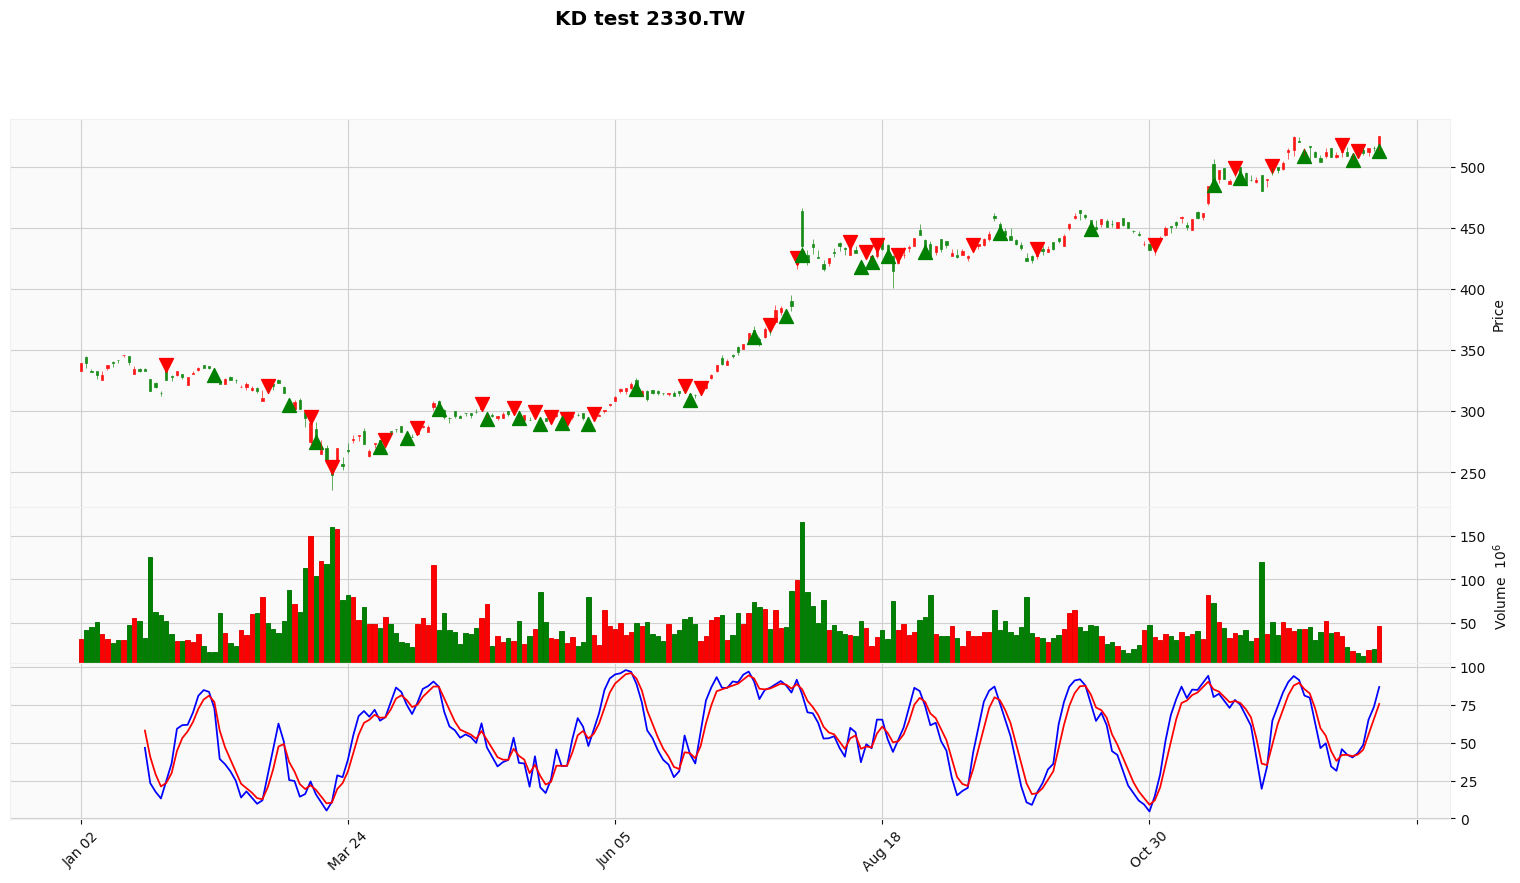

In [ ]:
# ＫＤ標準進出場圖

!pip install mplfinance
import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib inline

df.index  = pd.DatetimeIndex(df.index)
stock_id = "KD test " + ID + '.TW'
mc = mpf.make_marketcolors(up='r', down='g', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
add_plot =[mpf.make_addplot(df["buy_mark"],scatter=True, markersize=100, marker='v', color='r'),
           mpf.make_addplot(df["sell_mark"],scatter=True, markersize=100, marker='^', color='g'),
           mpf.make_addplot(df["K"],panel= 2,color="b"),
           mpf.make_addplot(df["D"],panel= 2,color="r")]
kwargs = dict(type='candle', volume = True,figsize=(20, 10),title = stock_id, style=s,addplot=add_plot)
mpf.plot(df, **kwargs)

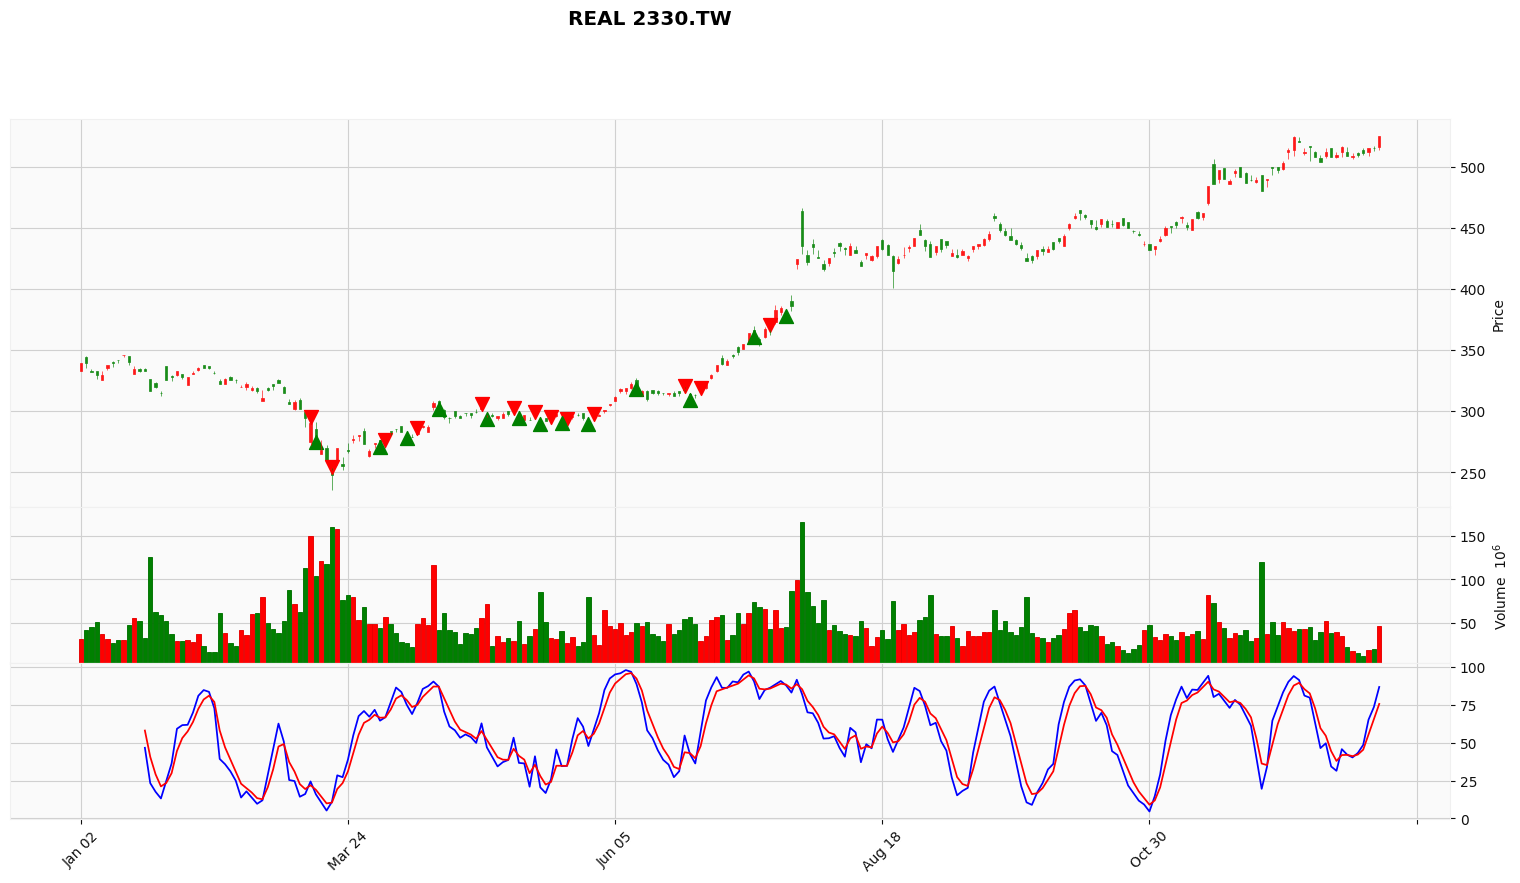

In [ ]:
#真實買賣進出場圖r_buy\r_sell 
df.index  = pd.DatetimeIndex(df.index) 
stock_id = "REAL "+ ID + '.TW'
mc = mpf.make_marketcolors(up='r', down='g', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
add_plot =[mpf.make_addplot(df["r_buy_mark"],scatter=True, markersize=100, marker='v', color='r'),
           mpf.make_addplot(df["r_sell_mark"],scatter=True, markersize=100, marker='^', color='g'),
           mpf.make_addplot(df["K"],panel= 2,color="b"),
           mpf.make_addplot(df["D"],panel= 2,color="r")]
kwargs = dict(type='candle', volume = True,figsize=(20, 10),title = stock_id, style=s,addplot=add_plot)
mpf.plot(df, **kwargs)

In [ ]:
#算次數

buy1 = df.loc[df["buy"].isin(["1"])]
sell1 = df.loc[df["sell"].isin(["-1"])]
print("買進次數 : " + str(len(buy1)) + "次")
print("賣出次數 : " + str(len(sell1)) + "次")

rbuy1 = df.loc[df["r_buy"].isin(["1"])]
rsell1 = df.loc[df["r_sell"].isin(["-1"])]
print("投入 $"+money+" 的買進次數 : " + str(len(rbuy1)) + "次")
print("投入 $"+money+" 的賣出次數 : " + str(len(rsell1)) + "次")


買進次數 : 27次
賣出次數 : 27次
投入 $300000 的買進次數 : 13次
投入 $300000 的賣出次數 : 13次


6/11 12:00 (紫寧) <br/>
- 計算遵照KD值每筆交易的報酬率、 計算累計報酬率、平均報酬率
- 計算實際每筆交易的報酬率、 計算累計報酬率、平均報酬率
- 計算遵照KD值的獲利金額、實際獲利金額

In [ ]:
#依KD值每筆交易的各種報酬率
return_rate = []
for i in range(len(buy1)):
    rate = round((sell1["Adj Close"][i] - buy1["Adj Close"][i]) / buy1["Adj Close"][i] * 100,2)
    return_rate.append(rate)
print("依照KD值買賣的每筆交易的報酬率")
for i in return_rate:
  print(i)

win = len([i for i in return_rate if i > 0])
lose = len([i for i in return_rate if i <= 0])
sum_t = len(return_rate)

cum_return = [0]
for i in range(len(return_rate)):
    cum = round(return_rate[i] + cum_return[i],2)
    cum_return.append(cum)
print("依照KD值買賣的總報酬為 :" + str(cum_return[-1]) + "%")
print("依照KD值買賣的平均每次報酬為 : " + str(round(cum_return[-1]/(win + lose),2)) + "%")

依照KD值買賣的每筆交易的報酬率
2.0
-3.78
-4.66
9.48
1.45
6.67
-3.12
-1.99
-2.68
-0.68
0.0
8.46
-1.73
14.33
4.23
2.47
-3.79
-0.47
-1.72
2.47
3.67
4.98
11.48
-0.91
2.61
-1.36
2.94
依照KD值買賣的總報酬為 :50.35%
依照KD值買賣的平均每次報酬為 : 1.86%


In [ ]:
#依實際每筆交易的各種報酬率
r_return_rate = []
for i in range(len(rbuy1)):
    r_rate = round((rsell1["Adj Close"][i] - rbuy1["Adj Close"][i]) / rbuy1["Adj Close"][i] * 100,2)
    r_return_rate.append(r_rate)
print("依照實際買賣的每筆交易的報酬率")
for i in r_return_rate:
  print(i)

r_win = len([i for i in r_return_rate if i > 0])
r_lose = len([i for i in r_return_rate if i <= 0])
r_sum_t = len(r_return_rate)

r_cum_return = [0]
for i in range(len(r_return_rate)):
    r_cum = round(r_return_rate[i] + r_cum_return[i],2)
    r_cum_return.append(r_cum)
print("依照實際買賣的總報酬為 :" + str(r_cum_return[-1]) + "%")
print("依照實際買賣的平均每次報酬為 : " + str(round(r_cum_return[-1]/(r_win + r_lose),2)) + "%")

依照實際買賣的每筆交易的報酬率
-4.66
9.48
1.45
6.67
-3.12
-1.99
-2.68
-0.68
0.0
8.46
-1.73
14.33
4.23
依照實際買賣的總報酬為 :29.76%
依照實際買賣的平均每次報酬為 : 2.29%


In [ ]:
#計算實際獲利金額

print ("依照實際情況獲利金額：", int(pocket)-int(money), "元")

依照實際情況獲利金額： 88000 元


6/12 12:00 (芸宣) <br/>
- 計算長期持有的累計報酬率
(長期持有進場的時間點為第一次黃金交叉、賣出的時間點: 結算的那一天)
- 將長期持有、依照KD買賣、依照實際買賣的累計報酬率畫圖做比較

In [ ]:
#依長期持有的各種報酬率
l_return_rate = []
for i in range(len(df)):
    l_rate = round((df["Close"][i] - df["Close"][0]) / df["Close"][0] * 100,2)
    l_return_rate.append(l_rate)

for i in l_return_rate:
  print(i)

l_cum_return = [0]
for i in range(len(l_return_rate)):
    l_cum = round(l_return_rate[i])
    l_cum_return.append(l_cum)
print("長期持有的總報酬為 :" + str(l_cum_return[-1]) + "%")

0.0
0.15
-2.06
-2.8
-2.8
-0.44
0.15
0.74
2.06
0.29
-1.33
-1.77
-1.77
-6.64
-5.6
-7.08
-4.13
-3.39
-1.92
-3.24
-3.39
-2.21
-1.18
-1.18
-1.18
-2.21
-5.01
-3.69
-3.98
-4.13
-5.6
-5.01
-6.05
-6.78
-8.26
-6.34
-5.46
-4.72
-7.08
-9.88
-9.44
-10.91
-13.27
-14.45
-18.44
-20.94
-23.3
-26.84
-20.35
-24.78
-21.09
-18.29
-17.4
-19.47
-21.09
-19.17
-19.91
-18.73
-16.52
-15.93
-16.52
-17.55
-17.85
-15.93
-15.19
-15.49
-9.59
-10.32
-12.98
-13.27
-12.83
-13.27
-12.09
-12.54
-11.8
-10.18
-12.98
-12.83
-12.68
-12.24
-12.24
-11.21
-12.98
-12.39
-13.57
-12.09
-14.45
-14.01
-13.27
-12.24
-13.86
-13.86
-12.83
-12.54
-13.27
-13.86
-12.83
-12.54
-11.21
-9.73
-8.11
-6.19
-5.9
-4.87
-5.46
-6.78
-8.7
-7.08
-7.08
-7.23
-7.23
-7.96
-7.08
-6.34
-7.96
-7.67
-6.34
-5.01
-2.8
-0.29
-0.15
0.59
1.77
2.8
4.57
7.23
7.08
5.46
8.26
7.96
12.98
13.27
12.54
13.86
25.22
28.32
24.48
28.02
25.52
22.71
25.52
26.55
28.32
27.73
28.47
26.55
23.6
26.55
25.96
28.32
27.73
26.11
22.42
25.22
26.25
28.17
30.38
30.97
28.32
25.81
28.32
27.73

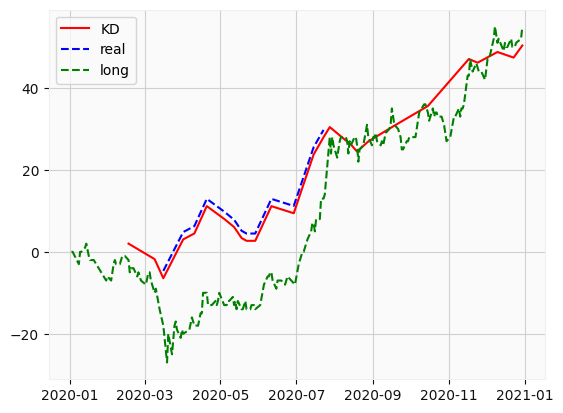

In [ ]:
cum_return1 = pd.DataFrame(cum_return[1:],index = sell1.index)
r_cum_return1 = pd.DataFrame(r_cum_return[1:],index = rsell1.index)
l_cum_return1 = pd.DataFrame(l_cum_return[1:],index = df.index)

plt.plot(cum_return1,"r-",label="KD")
plt.plot(r_cum_return1,"b--",label="real")
plt.plot(l_cum_return1,"g--",label="long")
plt.legend(loc="upper left")
plt.show()

6/14(叔孟) <br/>
- 遵照KD、限制金額(實際) 計算勝率並做策略勝率比較
- 統整

In [ ]:
#依照KD值買賣的勝率
win = len([i for i in return_rate if i > 0])
lose = len([i for i in return_rate if i <= 0])
sum_t = len(return_rate)
print("總獲利次數 : " + str(win) + "次")
print("總虧損次數 : " + str(lose) + "次")
print("總交易次數 : " + str(win + lose) + "次")
print("勝率為 : " + str(round(win / sum_t*100,2)) + "%")

總獲利次數 : 14次
總虧損次數 : 13次
總交易次數 : 27次
勝率為 : 51.85%


In [ ]:
#依照視資金KD值買賣的勝率
win = len([i for i in r_return_rate if i > 0])
lose = len([i for i in r_return_rate if i <= 0])
sum_t = len(r_return_rate)
print("總獲利次數 : " + str(win) + "次")
print("總虧損次數 : " + str(lose) + "次")
print("總交易次數 : " + str(win + lose) + "次")
print("勝率為 : " + str(round(win / sum_t*100,2)) + "%")

總獲利次數 : 6次
總虧損次數 : 7次
總交易次數 : 13次
勝率為 : 46.15%
